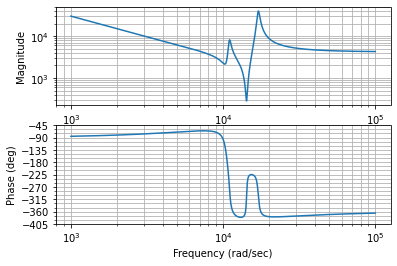

TransferFunction(array([1.05161170e+24, 1.09750096e+28, 3.24382849e+32, 3.49064583e+36,
       2.22177848e+40, 2.62097619e+44]), array([2.49234218e+20, 2.79371685e+23, 1.02469076e+29, 5.23057535e+31,
       8.73658730e+36, 0.00000000e+00]))

In [28]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
import tracetools as tt
import tf_freq_id

s = ctrl.tf('s')

w1 = 1750 * 2*np.pi


G = 0.3*1e8*1/s * 1/tt.sinu_tf.PT2(1680,-0.04) * tt.sinu_tf.PT2(1750,0.02)*(s/w1 + 1) * tt.sinu_tf.notch(2270,0.01,2710,0.02)
#G = 0.3*1e8*1/s * tt.sinu_tf.PT2(1750,0.02)*(s/w1 + 1) 
#G =  tt.sinu_tf.PT2(1750,0.02)
G



ctrl.bode(G)
plt.show()

G

TransferFunction(array([ 4219.37124619, -5220.04028862,  7696.12892737, -2479.07972202,
        1695.08040872,  1100.66511353]), array([ 1.        , -1.63494867,  2.30066607, -2.25307289,  1.48131747,
       -0.89396199]), 0.0001)

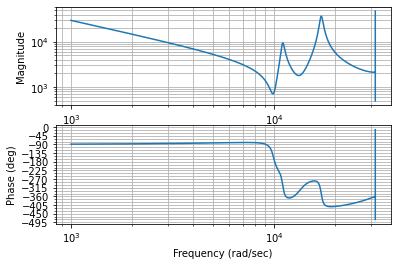

In [29]:
Ts = 1e-4
Gd = G.sample(Ts)
mag,phase,w = ctrl.bode(Gd,plot=False)

mag_db = ctrl.mag2db(mag) + np.random.randn(len(mag))*1
mag = ctrl.db2mag(mag_db)

phase += np.random.randn(len(phase))*np.deg2rad(3)

GY = mag*np.exp(1j*phase)
#GY = GY.reshape(-1,1,1)
ctrl.bode(Gd)

Gd

In [30]:
n = 8

M = []
Y = []


for i,yi in enumerate(GY):


    Ri = mag[i]
    phi = phase[i]
    wk = w[i]   

    Oi = wk*Ts

    row1 = []

    # Real part

    #R1 = Ri*(np.cos(phi) + np.cos(phi - Oi)*a[1] + np.cos(phi - 2*Oi)*a[2])
    #R2 = b[0] + np.cos(-Oi)*b[1] + np.cos(-2*Oi)*b[2]

    for i in range(1,n):
        row1.append(-Ri*np.cos(phi - Oi*i))

    for i in range(0,n):
        if i == 0:
            row1.append(1.0)
        else:
            row1.append(np.cos(-Oi*i))


    row2 = []
    # Imag part
    #I1 = Ri*(np.sin(phi) + np.sin(phi - Oi)*a[1] + np.sin(phi - 2*Oi)*a[2])
    #I2 = np.sin(-Oi)*b[1] + np.sin(-2*Oi)*b[2] # NO b0!

    for i in range(1,n):
        row2.append(-Ri*np.sin(phi - Oi*i))

    for i in range(0,n):
        if i == 0:
            row2.append(0.0)
        else:
            row2.append(np.sin(-Oi*i))

    M.append(row1)
    M.append(row2)

    Y.append(Ri*np.cos(phi))
    Y.append(Ri*np.sin(phi))



sol = np.linalg.lstsq(M,Y,rcond=None)
theta = sol[0]
theta




array([-1.52566041e+00,  1.60626443e+00, -1.28586351e+00,  2.21926017e-01,
        2.88464597e-01, -6.93974875e-01,  3.91051311e-01,  4.31609438e+03,
       -4.89661294e+03,  5.03739931e+03,  4.90923325e+02, -2.05781615e+03,
        2.21267697e+03, -7.40572953e+02, -5.11295447e+02])

[ 4316.09438125 -4896.61293916  5037.39931003   490.92332466
 -2057.81614855  2212.6769727   -740.57295342  -511.29544675]
[-1.52566041  1.60626443 -1.28586351  0.22192602  0.2884646  -0.69397488
  0.39105131]
2 states have been removed from the model


TransferFunction(array([ 4316.09438125, -5063.7765709 ,  7336.15910699, -2260.08906121,
        1603.61748764,  1049.53833472]), array([ 1.        , -1.56873047,  2.15848697, -2.13912622,  1.36018461,
       -0.80686161]), 0.0001)

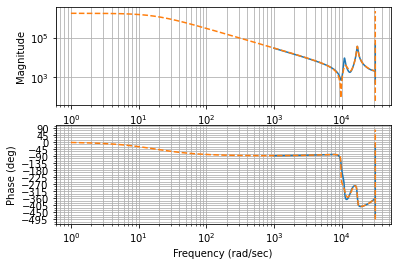

In [34]:
a = theta[0:n-1]
b = theta[n-1:]
print(b)
print(a)


a = np.r_[1,a]

Ge = ctrl.tf(b,a,Ts)
Ge = ctrl.minreal(Ge,tol=0.1)
ctrl.bode(Gd)
ctrl.bode(Ge,linestyle='--')

Ge

2 states have been removed from the model


(array([ 0.99826148+0.j        , -0.12752805+0.95924368j,
        -0.12752805-0.95924368j,  0.41276255+0.83233419j,
         0.41276255-0.83233419j]),
 array([ 0.56282589+0.83242447j,  0.56282589-0.83242447j,
         0.18354536+0.84856412j,  0.18354536-0.84856412j,
        -0.3195113 +0.j        ]))

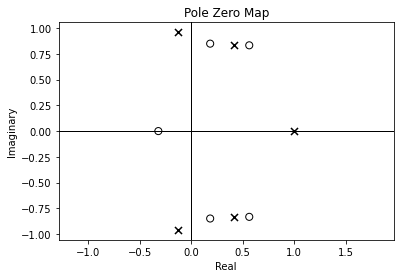

In [33]:

#Ge = ctrl.minreal(Ge,tol=0.1)

ctrl.pzmap(Ge)


